# Big Data Application Design Mid Term Project - Chicago Crime Analysis

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import *

In [2]:
# Creating Spark Session
spark = SparkSession.builder.appName('Chicago Crime Analysis').getOrCreate()
spark

In [3]:
# Time difference between pandas and pyspark for reading large datasets
%timeit spark.read.csv('./Crimes_-_2001_to_Present.csv')
%timeit pd.read_csv('./Crimes_-_2001_to_Present.csv')

492 ms ± 80.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 4s ± 934 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
# Reading dataset
df_spark = spark.read.csv('./Crimes_-_2001_to_Present.csv',header=True,inferSchema=True)
df_spark.show(vertical=True)

-RECORD 0------------------------------------
 ID                   | 10224738             
 Case Number          | HY411648             
 Date                 | 09/05/2015 01:30:... 
 Block                | 043XX S WOOD ST      
 IUCR                 | 0486                 
 Primary Type         | BATTERY              
 Description          | DOMESTIC BATTERY ... 
 Location Description | RESIDENCE            
 Arrest               | false                
 Domestic             | true                 
 Beat                 | 924                  
 District             | 9                    
 Ward                 | 12                   
 Community Area       | 61                   
 FBI Code             | 08B                  
 X Coordinate         | 1165074              
 Y Coordinate         | 1875917              
 Year                 | 2015                 
 Updated On           | 02/10/2018 03:50:... 
 Latitude             | 41.815117282         
 Longitude            | -87.669999

In [5]:
# Creating a copy of df_spark
df_sparkcp = df_spark

In [6]:
df_spark.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [7]:
df_spark.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [8]:
# Dropping the unuseful columns.
dropList = ['ID','Case Number','Block','Community Area','Ward','FBI Code','X Coordinate','Y Coordinate','Updated On']
df_spark = df_spark.drop(*dropList)
df_spark.show(vertical=True)

-RECORD 0------------------------------------
 Date                 | 09/05/2015 01:30:... 
 IUCR                 | 0486                 
 Primary Type         | BATTERY              
 Description          | DOMESTIC BATTERY ... 
 Location Description | RESIDENCE            
 Arrest               | false                
 Domestic             | true                 
 Beat                 | 924                  
 District             | 9                    
 Year                 | 2015                 
 Latitude             | 41.815117282         
 Longitude            | -87.669999562        
 Location             | (41.815117282, -8... 
-RECORD 1------------------------------------
 Date                 | 09/04/2015 11:30:... 
 IUCR                 | 0870                 
 Primary Type         | THEFT                
 Description          | POCKET-PICKING       
 Location Description | CTA BUS              
 Arrest               | false                
 Domestic             | false     

In [9]:
#columns after dropping 
df_spark.columns

['Date',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Year',
 'Latitude',
 'Longitude',
 'Location']

In [10]:
# describe the data
df_spark.describe().show(truncate=False, vertical=True)

-RECORD 0---------------------------------------------
 summary              | count                         
 Date                 | 7739718                       
 IUCR                 | 7739718                       
 Primary Type         | 7739718                       
 Description          | 7739718                       
 Location Description | 7729640                       
 Beat                 | 7739718                       
 District             | 7739671                       
 Year                 | 7739718                       
 Latitude             | 7654776                       
 Longitude            | 7654776                       
 Location             | 7654776                       
-RECORD 1---------------------------------------------
 summary              | mean                          
 Date                 | null                          
 IUCR                 | 1121.4910066208004            
 Primary Type         | null                          
 Descripti

In [11]:
# checking dtypes
df_spark.dtypes

[('Date', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'boolean'),
 ('Domestic', 'boolean'),
 ('Beat', 'int'),
 ('District', 'int'),
 ('Year', 'int'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('Location', 'string')]

In [12]:
# Transforming current Date column and adding two new columns
df_spark = df_spark.withColumn('temp', split(col('Date'),'\s')).withColumn('newDate',element_at(col('temp'),1)).withColumn('newTime',element_at(col('temp'),2)).drop('temp')
df_spark.show(vertical=True)

-RECORD 0------------------------------------
 Date                 | 09/05/2015 01:30:... 
 IUCR                 | 0486                 
 Primary Type         | BATTERY              
 Description          | DOMESTIC BATTERY ... 
 Location Description | RESIDENCE            
 Arrest               | false                
 Domestic             | true                 
 Beat                 | 924                  
 District             | 9                    
 Year                 | 2015                 
 Latitude             | 41.815117282         
 Longitude            | -87.669999562        
 Location             | (41.815117282, -8... 
 newDate              | 09/05/2015           
 newTime              | 01:30:00             
-RECORD 1------------------------------------
 Date                 | 09/04/2015 11:30:... 
 IUCR                 | 0870                 
 Primary Type         | THEFT                
 Description          | POCKET-PICKING       
 Location Description | CTA BUS   

In [13]:
df_spark.select(['Date','newDate','newTime']).show()

+--------------------+----------+--------+
|                Date|   newDate| newTime|
+--------------------+----------+--------+
|09/05/2015 01:30:...|09/05/2015|01:30:00|
|09/04/2015 11:30:...|09/04/2015|11:30:00|
|09/01/2018 12:01:...|09/01/2018|12:01:00|
|09/05/2015 12:45:...|09/05/2015|12:45:00|
|09/05/2015 01:00:...|09/05/2015|01:00:00|
|09/05/2015 10:55:...|09/05/2015|10:55:00|
|09/04/2015 06:00:...|09/04/2015|06:00:00|
|09/05/2015 01:00:...|09/05/2015|01:00:00|
|09/05/2015 11:30:...|09/05/2015|11:30:00|
|05/01/2016 12:25:...|05/01/2016|12:25:00|
|09/05/2015 02:00:...|09/05/2015|02:00:00|
|09/05/2015 11:00:...|09/05/2015|11:00:00|
|09/05/2015 03:00:...|09/05/2015|03:00:00|
|09/05/2015 12:50:...|09/05/2015|12:50:00|
|09/03/2015 01:00:...|09/03/2015|01:00:00|
|09/05/2015 11:45:...|09/05/2015|11:45:00|
|09/05/2015 01:30:...|09/05/2015|01:30:00|
|07/08/2015 12:00:...|07/08/2015|12:00:00|
|09/05/2015 09:55:...|09/05/2015|09:55:00|
|09/05/2015 12:35:...|09/05/2015|12:35:00|
+----------

In [14]:
# Drop the old Date column 
df_spark = df_spark.drop('Date')
df_spark.columns

['IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Year',
 'Latitude',
 'Longitude',
 'Location',
 'newDate',
 'newTime']

In [15]:
# Drop records having null values
print('Number of rows before dropping rows: ',df_spark.count())
df_spark = df_spark.na.drop()
print('Number of rows after dropping rows: ',df_spark.count())

Number of rows before dropping rows:  7739718
Number of rows after dropping rows:  7648308


In [16]:
# Renaming the columns
df_spark = df_spark.withColumnRenamed('newDate','Date')
df_spark = df_spark.withColumnRenamed('newTime','Time')
df_spark

DataFrame[IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Year: int, Latitude: double, Longitude: double, Location: string, Date: string, Time: string]

In [17]:
# lower case the column names
df_spark = df_spark.toDF(*[col.lower() for col in df_spark.columns])
df_spark.columns

['iucr',
 'primary type',
 'description',
 'location description',
 'arrest',
 'domestic',
 'beat',
 'district',
 'year',
 'latitude',
 'longitude',
 'location',
 'date',
 'time']

In [18]:
# Removing the duplicate rows
df_spark = df_spark.distinct()

In [19]:
# Creating list of distinct district values
district = df_spark.select('district').distinct().toPandas().district.tolist()

In [20]:
# Creating pandas dataframe based on individual district numbers. 
for distno in range(len(district)):
    df = 'df_' + str(district[distno])
    globals()[df] = df_spark.filter(df_spark['district']==district[distno]).toPandas()

In [21]:
df_1.groupby('year').get_group(2005)

,iucr,primary type,description,location description,arrest,domestic,beat,district,year,latitude,longitude,location,date,time
14474,0610,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,False,False,113,1,2005,41.884135,-87.632431,"(41.88413455, -87.632430739)",01/05/2005,01:30:00
14475,0890,THEFT,FROM BUILDING,"SCHOOL, PRIVATE, BUILDING",False,False,132,1,2005,41.873944,-87.625984,"(41.873944069, -87.62598437)",01/06/2005,09:00:00
14479,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,132,1,2005,41.857534,-87.625604,"(41.857533855, -87.625603607)",01/07/2005,10:30:00
14480,0610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,False,False,132,1,2005,41.876437,-87.629251,"(41.876436704, -87.629250558)",01/14/2005,06:00:00
14481,0810,THEFT,OVER $500,STREET,False,False,112,1,2005,41.878124,-87.633165,"(41.878123647, -87.633164725)",01/24/2005,09:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304478,0810,THEFT,OVER $500,OTHER,False,False,123,1,2005,41.880775,-87.627029,"(41.880775433, -87.627029031)",08/12/2005,12:00:00
304650,0810,THEFT,OVER $500,STREET,False,False,111,1,2005,41.880076,-87.639628,"(41.880075611, -87.639628321)",05/14/2005,12:30:00
304798,0810,THEFT,OVER $500,STREET,False,False,112,1,2005,41.880655,-87.634198,"(41.880654649, -87.634198338)",10/13/2005,06:00:00
305120,0460,BATTERY,SIMPLE,STREET,False,False,134,1,2005,41.851958,-87.627067,"(41.851958307, -87.627067195)",03/06/2005,04:50:44


In [24]:
yearList = df_spark.select('year').distinct().toPandas().year.tolist()
totalCasesPerYear = []
for val in range(len(yearList)):
    totalCasesPerYear.append(df_spark.filter(df_spark['year']==yearList[val]).count())

In [22]:
df_spark.filter(df_spark['year']==2007).count()

434308

In [23]:
df_years = pd.DataFrame({'years':yearList,'numberOFCases':totalCasesPerYear})

NameError: name 'yearList' is not defined

<AxesSubplot: title={'center': 'Total cases per year'}, xlabel='Years', ylabel='Cases'>

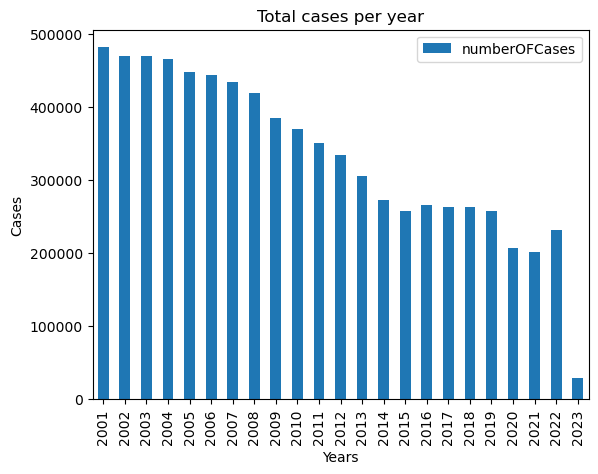

In [211]:
# Bar graph of Year against NumberOfCases
df_years.sort_values(by=['years']).plot.bar(x='years',y='numberOFCases',xlabel='Years',ylabel='Cases',title='Total cases per year')

In [223]:
df_spark.filter(df_spark['arrest']==True).show(vertical=True)

-RECORD 0------------------------------------
 iucr                 | 0497                 
 primary type         | BATTERY              
 description          | AGGRAVATED DOMEST... 
 location description | APARTMENT            
 arrest               | true                 
 domestic             | true                 
 beat                 | 1133                 
 district             | 11                   
 year                 | 2015                 
 latitude             | 41.87541531          
 longitude            | -87.713930327        
 location             | (41.87541531, -87... 
 date                 | 03/21/2015           
 time                 | 08:33:00             
-RECORD 1------------------------------------
 iucr                 | 2027                 
 primary type         | NARCOTICS            
 description          | POSS: CRACK          
 location description | STREET               
 arrest               | true                 
 domestic             | false     

In [224]:
df_1[(df_1['arrest'] == True) & (df_1['year'] >= 2019)]

,iucr,primary type,description,location description,arrest,domestic,beat,district,year,latitude,longitude,location,date,time
623,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,133,1,2020,41.843879,-87.620433,"(41.843879386, -87.620432585)",08/08/2020,10:00:00
1820,0860,THEFT,RETAIL THEFT,DRUG STORE,True,False,111,1,2019,41.884650,-87.627915,"(41.884650262, -87.627915459)",10/16/2019,03:33:00
2181,0860,THEFT,RETAIL THEFT,DRUG STORE,True,False,123,1,2020,41.867415,-87.627231,"(41.867414944, -87.627231186)",08/09/2020,05:40:00
2640,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,111,1,2020,41.883500,-87.627877,"(41.883500187, -87.627876698)",12/11/2020,06:00:00
2795,0460,BATTERY,SIMPLE,SIDEWALK,True,False,114,1,2019,41.885085,-87.624481,"(41.885084656, -87.624480684)",10/13/2019,04:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306122,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,111,1,2022,41.883500,-87.627877,"(41.883500187, -87.627876698)",10/18/2022,02:39:00
306126,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,132,1,2022,41.866977,-87.622544,"(41.866977138, -87.622544036)",11/05/2022,08:32:00
306128,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,123,1,2022,41.868217,-87.630453,"(41.86821682, -87.6304532)",11/15/2022,11:31:00
306135,1310,CRIMINAL DAMAGE,TO PROPERTY,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,123,1,2022,41.867344,-87.632295,"(41.867344428, -87.632294763)",12/24/2022,07:29:00
